### Time Series Analysis
- time series decomposition

In [1]:
import yfinance as yf
import matplotlib.pyplot as   plt

stock_data = yf.download('TSLA', start='2025-01-01')
stock_data.head(10)

/tmp/ipython-input-3448270020.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('TSLA', start='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2025-01-02,379.279999,392.730011,373.040009,390.100006,109710700
2025-01-03,410.440002,411.880005,379.450012,381.480011,95423300
2025-01-06,411.049988,426.429993,401.700012,423.200012,85516500
2025-01-07,394.359985,414.329987,390.000000,405.829987,75699500
2025-01-08,394.940002,402.500000,387.399994,392.950012,73038800
2025-01-10,394.739990,399.279999,377.290009,391.399994,62287300
2025-01-13,403.309998,403.790009,380.070007,383.209991,67580500
2025-01-14,396.359985,422.640015,394.540009,414.339996,84565000


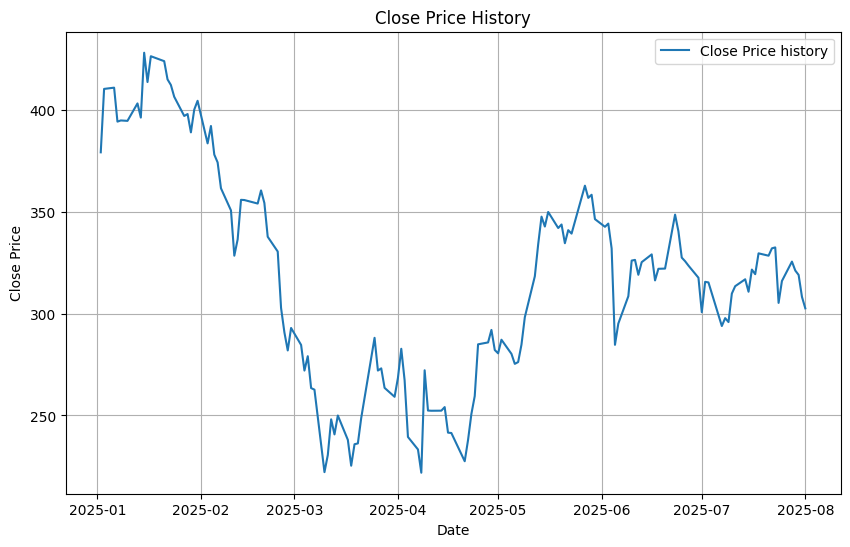

In [2]:
plt.figure(figsize=(10,6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price history')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### ADF Stationarity Test

In [3]:
from statsmodels.tsa.stattools import adfuller

## Performing Augmented Dicky-Fuller Test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f"ADF Statistic: {round(adf_test[0], 3)}")
print(f"p-value: {round(adf_test[1], 3)}")
print(f"Critical Values:")
for key, value in adf_test[4].items():
    print(f"\t{key}: {round(value, 3)}")

ADF Test Results:
ADF Statistic: -1.789
p-value: 0.386
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578


### p-value is greater than 0.05, so the data is non-stationary

### KPSS Test

In [6]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(stock_data['Close'], regression='ct')

print('KPSS Test Results:')
print(f"KPSS Statistic: {round(kpss_test[0], 2)}")
print(f"p-value: {(kpss_test[1])}")
print(f"Critical Values:")
for key, value in kpss_test[3].items():
    print(f"\t{key}: {round(value, 3)}")


KPSS Test Results:
KPSS Statistic: 0.31
p-value: 0.01
Critical Values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


/tmp/ipython-input-574323857.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')


### It's non-stionary ...p-value is less than 0.05